In [1]:
####importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

dataset=pd.read_csv(r'C:\Users\KOTHA SAI\Downloads\cars.csv')####loading dataset

In [3]:
dataset=dataset.iloc[:,:-1]
dataset.head()########removing buying price column

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price
0,1,781997,881997,10,72310,2,2,16,186,58,194,461803
1,2,553464,643464,9,72189,5,6,6,173,81,189,273747
2,3,1175130,1275130,10,74100,5,4,14,184,104,95,852711
3,4,884824,924824,4,34340,1,7,20,183,125,122,701224
4,5,412866,462866,5,48050,1,1,10,189,89,114,213995


In [4]:
nan_features=[feature for feature in dataset.columns if dataset[feature].isnull().sum() >1]##########finding missing  values

In [5]:
len(nan_features)######there are no missing values

0

In [6]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O' and feature!='v.id']###finding numerica features

In [7]:
len(numerical_features)##11 numerical columns 

11

In [8]:
for feature in numerical_features:
    print(feature,"             ",len(dataset[feature].unique()))####finding unique values

on road old               1998
on road now               1998
years               10
km                1927
rating               5
condition               10
economy               15
top speed               61
hp               91
torque               121
buying price               1999


In [9]:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique()) <16]#########finding discrete features

In [10]:
discrete_features#####four discrete values are there

['years', 'rating', 'condition', 'economy']

In [11]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_features]#####finding continous features

In [12]:
continous_feature  ##7 continous features are there 

['on road old',
 'on road now',
 'km ',
 'top speed',
 'hp',
 'torque',
 'buying price']

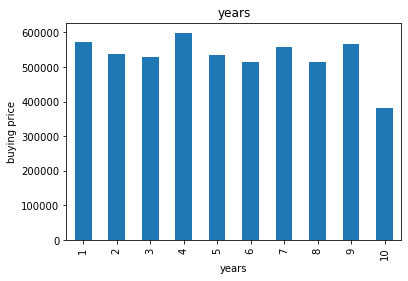

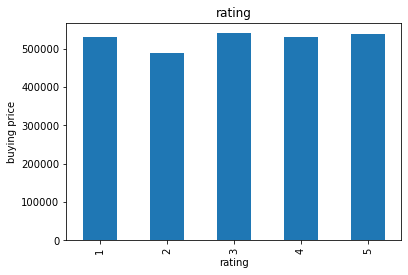

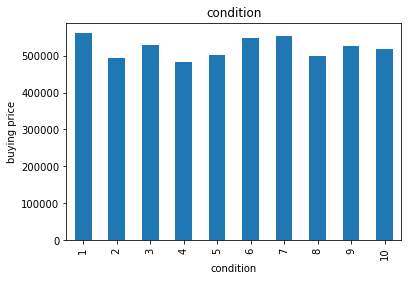

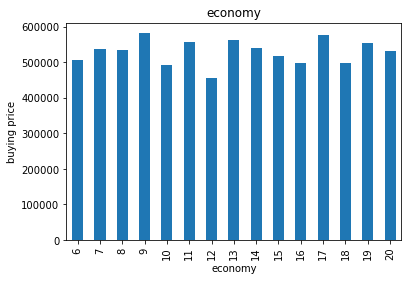

In [13]:
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['buying price'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('buying price')
    plt.show()
######plotting discrete with dependent variable


#######for continous feature#############

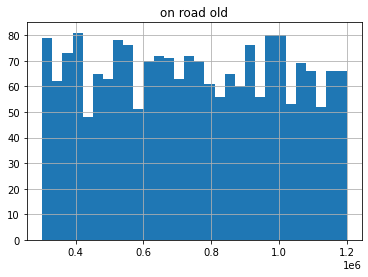

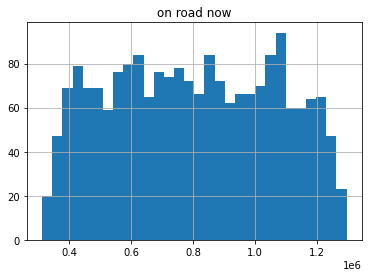

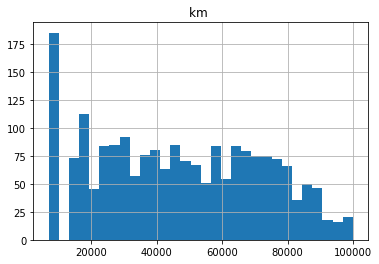

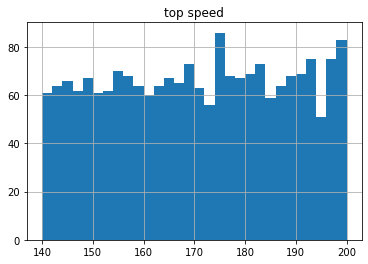

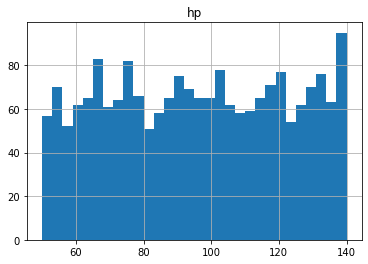

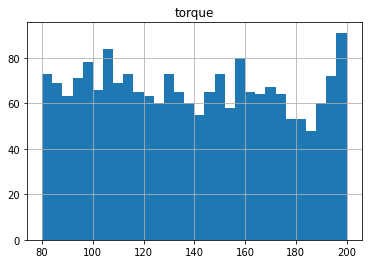

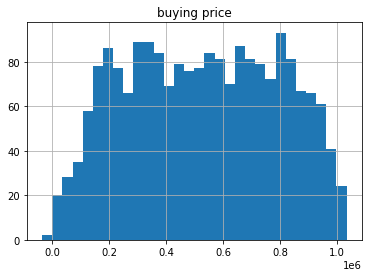

In [14]:
for feature in continous_feature:
    data=dataset.copy()
    dataset[feature].hist(bins=30)
    plt.title(feature)
    plt.show()
    
    
####plotting continous variable using histogram

c:\users\kotha sai\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


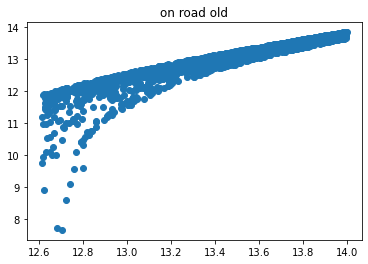

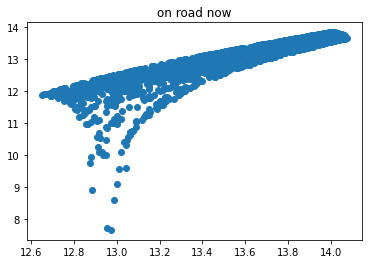

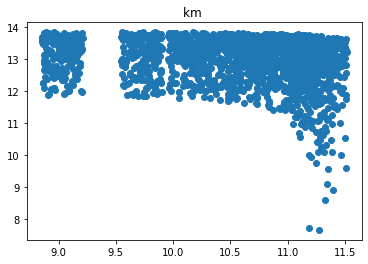

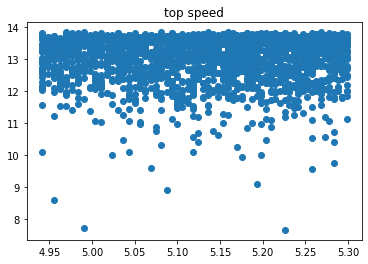

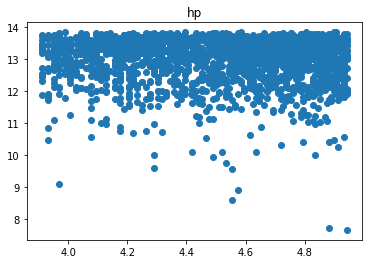

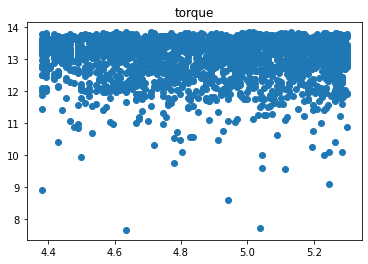

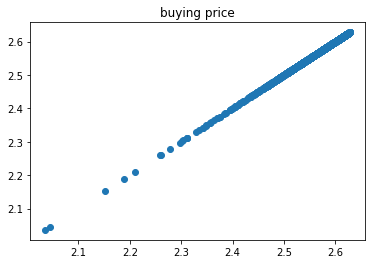

In [23]:
for feature in continous_feature:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data['buying price']=np.log(data['buying price'])
    plt.scatter(data[feature],data['buying price'])
    plt.title(feature)
    plt.show()

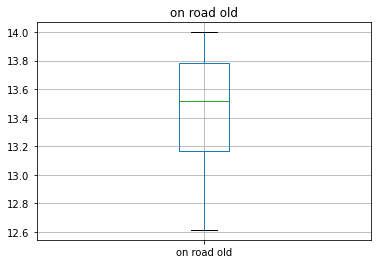

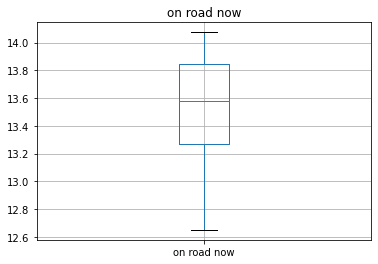

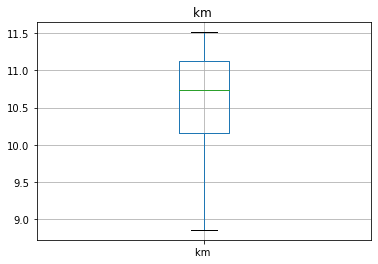

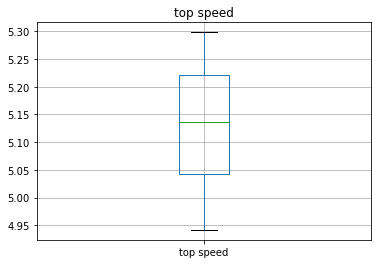

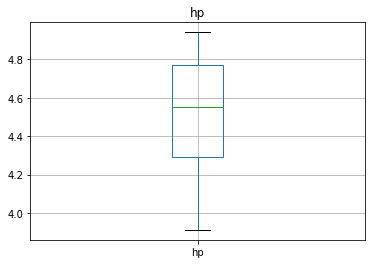

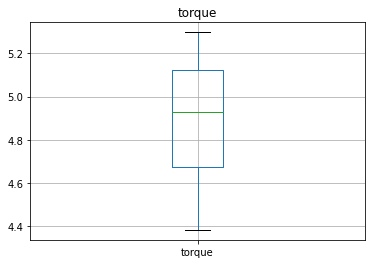

c:\users\kotha sai\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


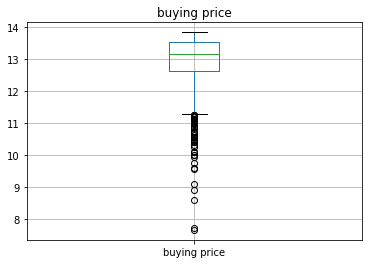

In [25]:
for feature in continous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()
######fo    